In [1]:
%matplotlib inline
import numpy as np # 1.19.4
import matplotlib.pyplot as plt # 3.3.3
import pandas as pd # 1.1.5


In [2]:
data = pd.read_csv('energetic_calm_data.csv')
data = data.drop('instrumentalness', axis=1)
data.head()


,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,Pulling Me Down,Pulling Me Down,Revelries,3BfJ695pBWcdisi1TsJtQW,2021-11-26,53,162590,0.633,0.00401,0.882,0.1440,0.372,-5.415,0.0713,123.992,7,4,energetic
1,Don't Worry,Don't Worry,Lone Tusker,5HCw4edXKPhXqh2YRAL2aC,2021-10-15,47,139484,0.680,0.13400,0.749,0.3940,0.425,-7.248,0.0280,114.005,10,4,energetic
2,Heatwave,Heatwave,Revelries,5JHREaHmnVSbPPUxwhstVj,2021-07-16,57,161194,0.673,0.09500,0.776,0.1970,0.532,-5.536,0.0442,124.014,4,4,energetic
3,Wade In Your Water,Summer Anthems,Common Kings,6DoYk3QIvkDs60S1d01vbx,2013-08-13,61,184013,0.598,0.26000,0.687,0.1120,0.626,-9.021,0.0955,75.169,7,4,energetic
4,If I'm Lucky,If I'm Lucky,Jason Derulo,6eUncuJutsFi9BGO1JaBHh,2017-08-31,56,212013,0.897,0.00413,0.634,0.0686,0.506,-6.264,0.1610,112.048,4,4,energetic


In [3]:
from sklearn.model_selection import train_test_split # 0.23.2


In [4]:
train_set, test_set = train_test_split(data, test_size=0.20, random_state=42)
print('Broj primjera za treniranje: ' + str(len(train_set)))
print('Broj primjera za testiranje: ' + str(len(test_set)))


Broj primjera za treniranje: 2188
Broj primjera za testiranje: 548


In [5]:
columns = ["popularity", "length", "danceability", "acousticness", "energy", "liveness", "valence", "loudness", "speechiness", "tempo", "key", "time_signature"]
energetic_data = data.loc[data["mood"] == "energetic", :][columns].astype(float)
calm_data = data.loc[data["mood"] == "calm", :][columns].astype(float)
histogram_data = data[columns].astype(float)

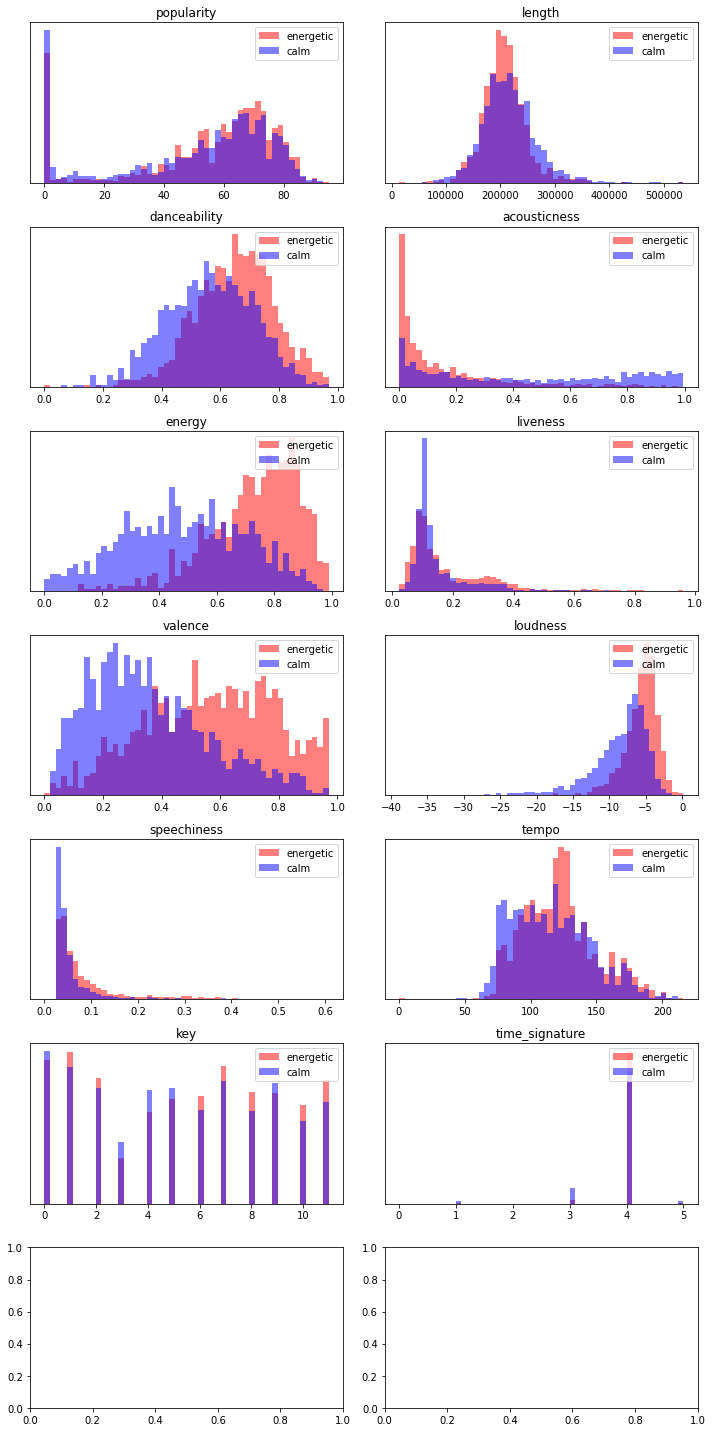

In [6]:
fig, axes = plt.subplots(7, 2, figsize=(10, 20))
ax = axes.ravel() # axes are 2-dimensional so we unfold them
for i in range(12):
    _, bins = np.histogram(histogram_data.iloc[:,i], bins=50)
    ax[i].hist(energetic_data.iloc[:,i], bins=bins, color='r', alpha=.5, label='energetic')
    ax[i].hist(calm_data.iloc[:,i], bins=bins, color='b', alpha=.5, label='calm')
    ax[i].set_title(histogram_data.columns.values[i])
    ax[i].set_yticks(()) # remove ticks on y-axis
    ax[i].legend(loc='upper right')
fig.tight_layout()

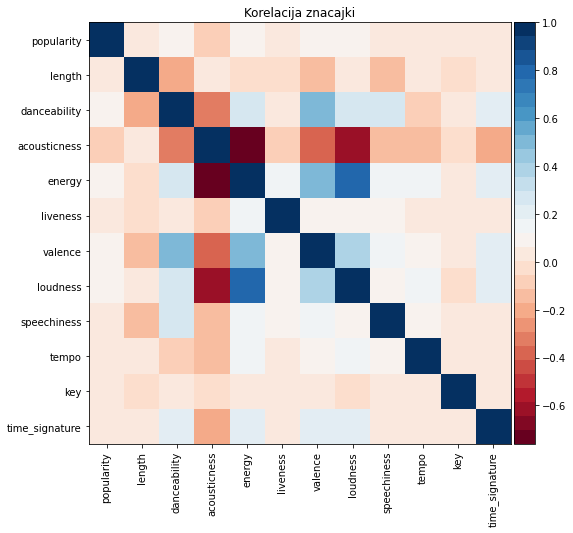

In [7]:
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

X_corr = histogram_data.corr()
cmap = cm.get_cmap('RdBu', 30)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
iax = ax.imshow(X_corr, interpolation="nearest", cmap=cmap)
ax.grid(False)
ax.set(title='Korelacija znacajki')
ax.set_xticks(range(X_corr.shape[1]))
ax.set_xticklabels(histogram_data.columns.values, rotation=90)
ax.set_yticks(range(X_corr.shape[1]))
ax.set_yticklabels(histogram_data.columns.values)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(iax,cax)

plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


In [9]:
data = pd.read_csv('energetic_calm_data.csv',index_col=0)
data = data.drop('instrumentalness', axis = 1)
col_features = data.columns[5:-3]
col_features


Index(['length', 'danceability', 'acousticness', 'energy', 'liveness',
       'valence', 'loudness', 'speechiness', 'tempo'],
      dtype='object')

In [10]:
data = data[col_features]
data

,length,danceability,acousticness,energy,liveness,valence,loudness,speechiness,tempo
name,,,,,,,,,
Pulling Me Down,162590,0.633,0.00401,0.882,0.1440,0.372,-5.415,0.0713,123.992
Don't Worry,139484,0.680,0.13400,0.749,0.3940,0.425,-7.248,0.0280,114.005
Heatwave,161194,0.673,0.09500,0.776,0.1970,0.532,-5.536,0.0442,124.014
Wade In Your Water,184013,0.598,0.26000,0.687,0.1120,0.626,-9.021,0.0955,75.169
If I'm Lucky,212013,0.897,0.00413,0.634,0.0686,0.506,-6.264,0.1610,112.048
...,...,...,...,...,...,...,...,...,...
Icy,178622,0.836,0.02840,0.662,0.0781,0.606,-5.063,0.0623,111.519
Gotta Get Back (feat. Pink Sweat$),179333,0.733,0.34000,0.532,0.0738,0.719,-4.469,0.0553,162.656
Tainted Love,201666,0.628,0.03780,0.695,0.3580,0.398,-5.328,0.0327,113.972


In [11]:


scaler = MinMaxScaler()
X = data #.drop('name', axis=1)
scaler.fit(X)
X_scaled = scaler.transform(X)

pca = PCA() # use option n_components=2 to calculate just first two principal components
pca.fit(X_scaled) # fit PCA model to breast cancer data
X_pca = pca.transform(X_scaled) # transform data onto the principal components
print("Dimenzije originalnih podataka: %s" % str(X_scaled.shape))
print("Dimenzije projiciranih podataka: %s" % str(X_pca.shape))


Dimenzije originalnih podataka: (2736, 9)
Dimenzije projiciranih podataka: (2736, 9)


In [12]:
data_pca = pd.DataFrame(X_pca, columns=['PC'+str(i) for i in range(1,X_pca.shape[1]+1)])
data_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.326859,-0.222225,-0.007476,-0.012616,-0.006056,0.098936,-0.050861,-0.111611,0.054466
1,-0.194615,-0.089312,0.021191,0.194941,-0.109212,-0.069031,-0.112383,-0.142316,0.052274
2,-0.279537,-0.028210,0.002130,-0.001154,-0.030536,-0.008062,-0.066149,-0.097750,0.018306
3,-0.111346,0.132672,-0.071645,-0.037530,-0.136224,0.064491,0.147290,-0.046979,0.059398
4,-0.298444,0.002266,-0.319816,0.014982,0.127884,0.033431,-0.033320,0.036977,0.003254


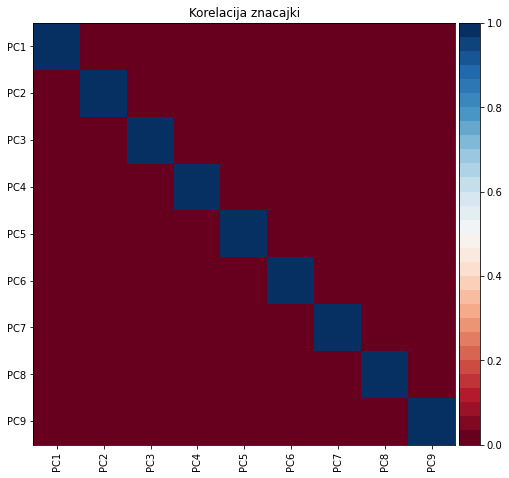

In [13]:
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

X_corr = data_pca.corr()
cmap = cm.get_cmap('RdBu', 30)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
iax = ax.imshow(X_corr, interpolation="nearest", cmap=cmap)
plt.grid(False)
ax.set(title='Korelacija znacajki')
ax.set_xticks(range(X_corr.shape[1]))
ax.set_xticklabels(data_pca.columns.values, rotation=90)
ax.set_yticks(range(X_corr.shape[1]))
ax.set_yticklabels(data_pca.columns.values)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(iax,cax)

plt.show();


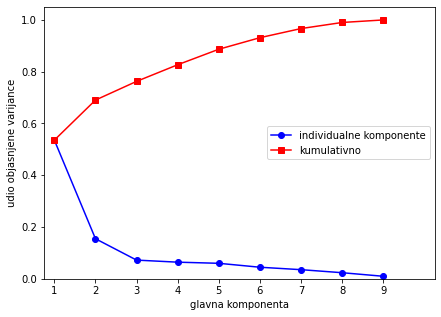

In [14]:
plt.figure(figsize=(7,5))

explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_cummulative = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1,X_pca.shape[1]+1), explained_variance_ratio, '-o', label='individualne komponente', c='b')
plt.plot(range(1,X_pca.shape[1]+1), explained_variance_ratio_cummulative, '-s', label='kumulativno', c='r')

plt.ylabel('udio objasnjene varijance')
plt.xlabel('glavna komponenta')
plt.xlim(0.75,X_pca.shape[1]+1.25)
plt.ylim(0,1.05)
plt.xticks(range(1,X_pca.shape[1]+1))
plt.legend(loc='center right')
plt.show()


In [15]:
data.reset_index()

,name,length,danceability,acousticness,energy,liveness,valence,loudness,speechiness,tempo
0,Pulling Me Down,162590,0.633,0.00401,0.882,0.1440,0.372,-5.415,0.0713,123.992
1,Don't Worry,139484,0.680,0.13400,0.749,0.3940,0.425,-7.248,0.0280,114.005
2,Heatwave,161194,0.673,0.09500,0.776,0.1970,0.532,-5.536,0.0442,124.014
3,Wade In Your Water,184013,0.598,0.26000,0.687,0.1120,0.626,-9.021,0.0955,75.169
4,If I'm Lucky,212013,0.897,0.00413,0.634,0.0686,0.506,-6.264,0.1610,112.048
...,...,...,...,...,...,...,...,...,...,...
2731,Icy,178622,0.836,0.02840,0.662,0.0781,0.606,-5.063,0.0623,111.519
2732,Gotta Get Back (feat. Pink Sweat$),179333,0.733,0.34000,0.532,0.0738,0.719,-4.469,0.0553,162.656
2733,Tainted Love,201666,0.628,0.03780,0.695,0.3580,0.398,-5.328,0.0327,113.972
2734,Warriors,170066,0.365,0.09640,0.851,0.2380,0.309,-6.238,0.0650,78.068


In [16]:
data = pd.read_csv('energetic_calm_data.csv')
data = data.drop('instrumentalness', axis = 1)
data["mood"]
data.reset_index()

,index,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,0,Pulling Me Down,Pulling Me Down,Revelries,3BfJ695pBWcdisi1TsJtQW,2021-11-26,53,162590,0.633,0.00401,0.882,0.1440,0.372,-5.415,0.0713,123.992,7,4,energetic
1,1,Don't Worry,Don't Worry,Lone Tusker,5HCw4edXKPhXqh2YRAL2aC,2021-10-15,47,139484,0.680,0.13400,0.749,0.3940,0.425,-7.248,0.0280,114.005,10,4,energetic
2,2,Heatwave,Heatwave,Revelries,5JHREaHmnVSbPPUxwhstVj,2021-07-16,57,161194,0.673,0.09500,0.776,0.1970,0.532,-5.536,0.0442,124.014,4,4,energetic
3,3,Wade In Your Water,Summer Anthems,Common Kings,6DoYk3QIvkDs60S1d01vbx,2013-08-13,61,184013,0.598,0.26000,0.687,0.1120,0.626,-9.021,0.0955,75.169,7,4,energetic
4,4,If I'm Lucky,If I'm Lucky,Jason Derulo,6eUncuJutsFi9BGO1JaBHh,2017-08-31,56,212013,0.897,0.00413,0.634,0.0686,0.506,-6.264,0.1610,112.048,4,4,energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2731,Icy,The Prelude,Pink Sweat$,4IXtbeWsD2DQWnTfjDSMjm,2020-07-17,45,178622,0.836,0.02840,0.662,0.0781,0.606,-5.063,0.0623,111.519,10,4,calm
2732,2732,Gotta Get Back (feat. Pink Sweat$),Gotta Get Back (feat. Pink Sweat$),P1Harmony,5760o7vIytByWNmmf115wj,2022-05-26,64,179333,0.733,0.34000,0.532,0.0738,0.719,-4.469,0.0553,162.656,0,4,calm
2733,2733,Tainted Love,Tainted Love,Isaac Dunbar,2nx6I5R9C8nfBofUdlXoRA,2022-04-01,54,201666,0.628,0.03780,0.695,0.3580,0.398,-5.328,0.0327,113.972,0,4,calm
2734,2734,Warriors,Smoke + Mirrors (Deluxe),Imagine Dragons,1lgN0A2Vki2FTON5PYq42m,2015-10-30,69,170066,0.365,0.09640,0.851,0.2380,0.309,-6.238,0.0650,78.068,4,4,calm


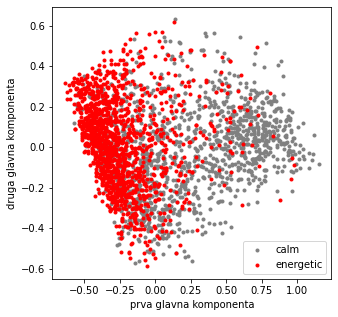

In [17]:
plt.figure(figsize=(5, 5))

plt.scatter(data_pca.loc[data.loc[:,'mood']=='calm','PC1'], 
            data_pca.loc[data.loc[:,'mood']=='calm','PC2'],
            color='gray', marker='.', label='calm')

plt.scatter(data_pca.loc[data.loc[:,'mood']=='energetic','PC1'], 
            data_pca.loc[data.loc[:,'mood']=='energetic','PC2'], 
            color='red', marker='.', label='energetic')
plt.legend()
plt.xlabel("prva glavna komponenta")
plt.ylabel("druga glavna komponenta")
plt.show()


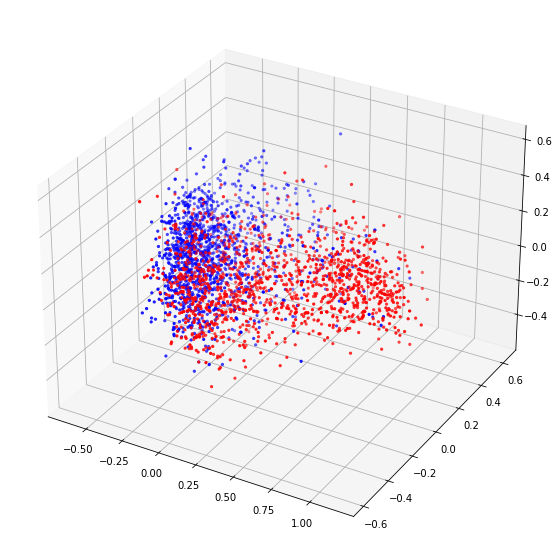

In [18]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_pca.loc[data.loc[:,'mood']=='calm','PC1'], 
            data_pca.loc[data.loc[:,'mood']=='calm','PC2'],
           data_pca.loc[data.loc[:,'mood']=='calm','PC3'],
            color='red', marker='.', label='calm')

ax.scatter(data_pca.loc[data.loc[:,'mood']=='energetic','PC1'], 
            data_pca.loc[data.loc[:,'mood']=='energetic','PC2'], 
           data_pca.loc[data.loc[:,'mood']=='energetic','PC3'],
            color='blue', marker='.', label='energetic')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [20]:
data = pd.read_csv('energetic_calm_data.csv',index_col=0)

data_train, data_test = train_test_split(data, test_size=0.30, random_state=39)

X_train = data_train[col_features]
y_train = data_train['mood']

X_test = data_test[col_features]
y_test = data_test['mood']

pipe = Pipeline(steps=[('scaler', MinMaxScaler()),
                       ('pca', PCA()),
                       ('logistic',LogisticRegression(solver='liblinear'))])

components_to_evaluate = 10

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=range(1,components_to_evaluate)),
                         cv=10,
                         scoring='accuracy')

model = estimator.fit(X_train, y_train)


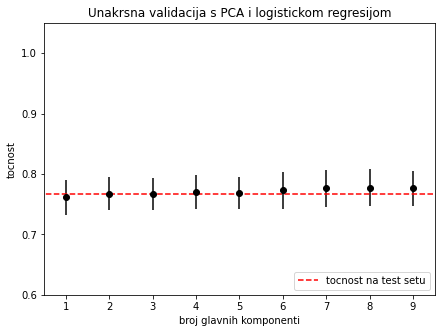

In [21]:
plt.figure(figsize=(7,5))

results_selected = zip(model.cv_results_['params'],model.cv_results_['mean_test_score'],model.cv_results_['std_test_score'])
for params, mean_scores, std_scores in results_selected:
    plt.errorbar(params['pca__n_components'], mean_scores, yerr=std_scores, fmt='ok')

plt.hlines(accuracy_score(y_test, model.predict(X_test)), 0, components_to_evaluate, 
           color='red', linestyle='--', 
           label='tocnost na test setu')

plt.ylabel('tocnost')
plt.xlabel('broj glavnih komponenti')
plt.title('Unakrsna validacija s PCA i logistickom regresijom')
plt.xlim(0.5,components_to_evaluate-0.5)
plt.ylim(0.6,1.05)
plt.xticks(range(1,components_to_evaluate))
plt.legend(loc='lower right')
plt.show()


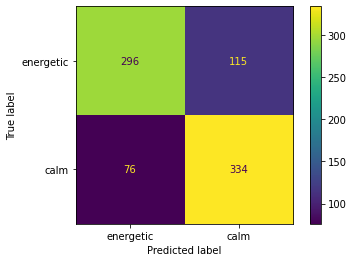

In [22]:
from sklearn import metrics

actual = y_test
predicted = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["energetic", "calm"])

cm_display.plot()
plt.show()